In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 15.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ea2b8c2f0a7a18aeabe11f59f79f02f7d8b928a73c4096b98c560afaf057e4c3
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


##Decision Tree
붓꽃 데이터 시각화 만들기 


In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

#데이터 로드 
iris = load_iris()
train_x,test_x,train_y,test_y = train_test_split(iris.data,iris.target,test_size = 0.2,random_state = 0)
#model 학습 
model = DecisionTreeClassifier(max_depth=4,random_state=42).fit(train_x,train_y)

#model 평가 
print(model.score(train_x,train_y),model.score(test_x,test_y))

0.9916666666666667 1.0


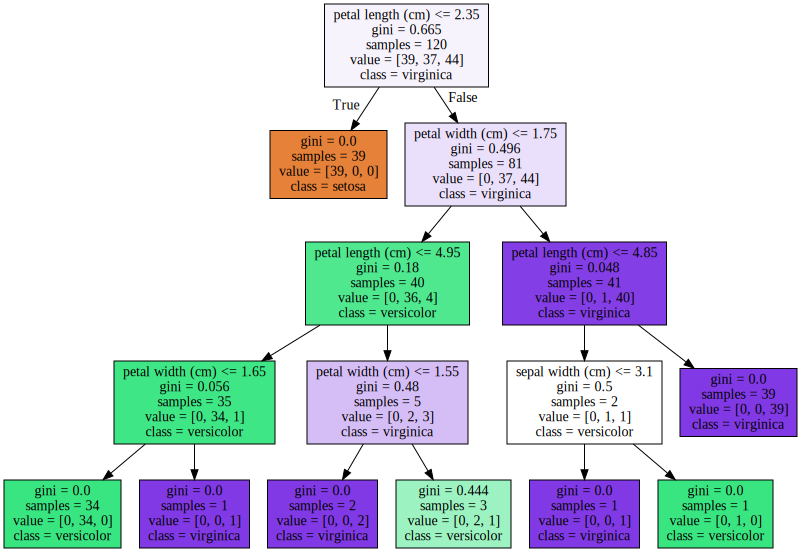

In [4]:
#결정 트리 시각화 1(트리 전용 시각화 알고리즘 으로 만들기 )
from sklearn.tree import export_graphviz #트리 시각화 전용 라이브러리 
import graphviz

#tree.dot 파일 생성 
export_graphviz(model,out_file = 'tree.dot',class_names = iris.target_names,feature_names = iris.feature_names,filled = True)

#시각화 
with open('tree.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

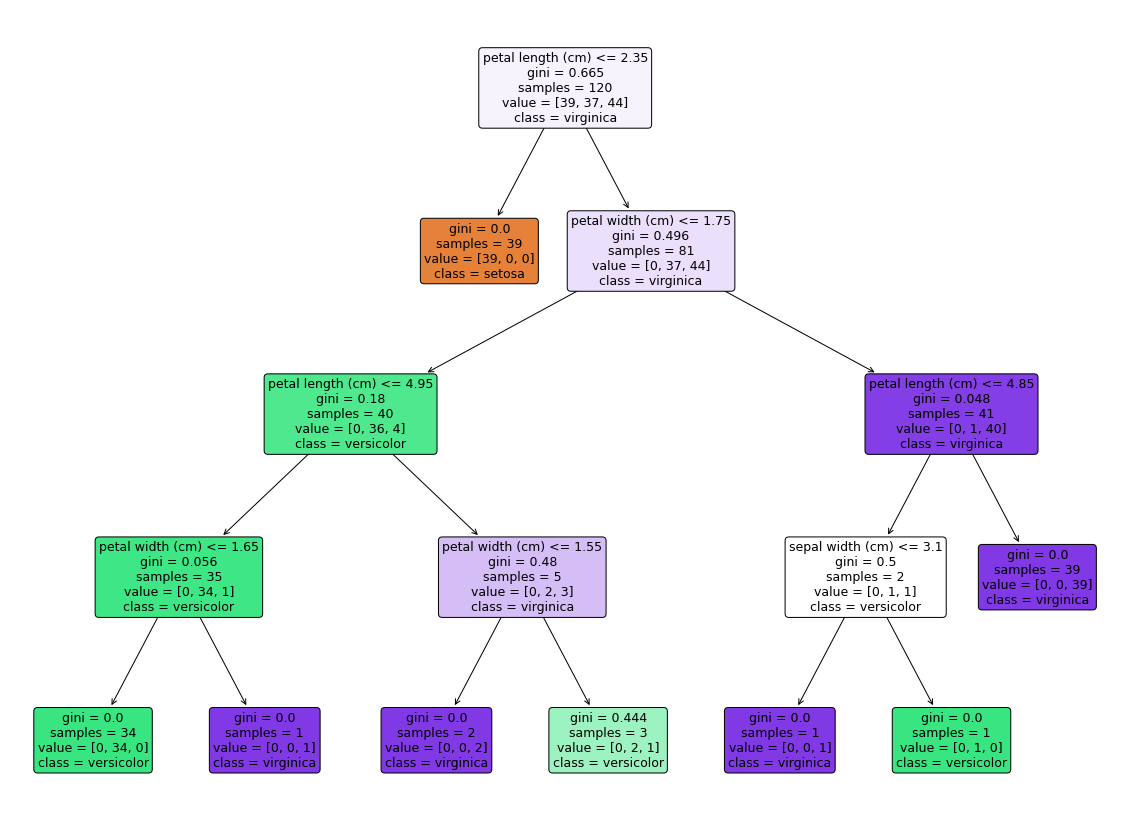

In [5]:
#결정트리 시각화 2 (사이킷런 으로 만들기 )
import matplotlib.pyplot as plt
from sklearn import tree 
plt.figure(figsize =(20,15))
tree.plot_tree(model,class_names=iris.target_names,feature_names=iris.feature_names,filled = True,rounded = True)
plt.show()

0.9833333333333333 0.9666666666666667


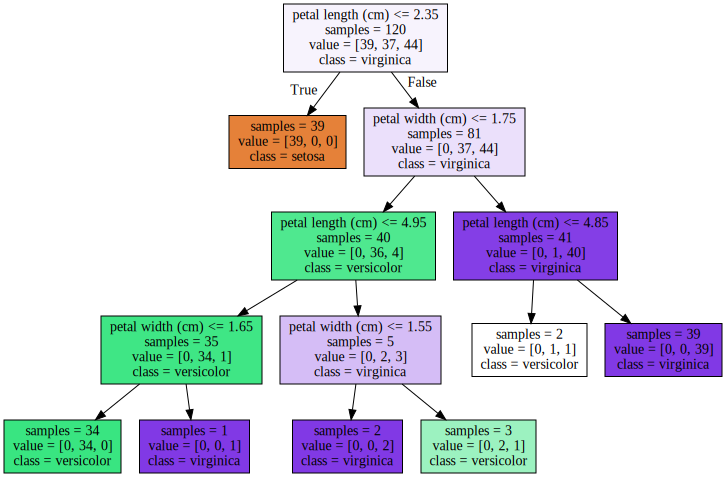

In [6]:
#min_sample_split 을 사용해서 Decision Tree 학습 = 부모 노드의 sample 이 N 이상이면 분할을 실시한다.
model = DecisionTreeClassifier(min_samples_split = 4,random_state = 42).fit(train_x,train_y)

print(model.score(train_x,train_y),model.score(test_x,test_y))

#시각화 
export_graphviz(model,out_file = 'tree.dot',class_names= iris.target_names,feature_names=iris.feature_names,filled= True ,impurity= False)
with open('tree.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

0.9666666666666667 1.0


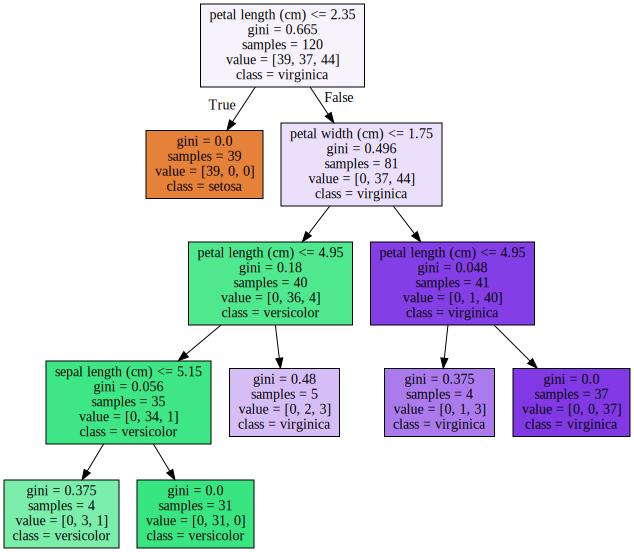

In [7]:
#min_sample_leaf : 리프 노드가 N 개 이하 이면 분할을 멈춘다.
model = DecisionTreeClassifier(min_samples_leaf=4,random_state=42).fit(train_x,train_y)

print(model.score(train_x,train_y),model.score(test_x,test_y))

export_graphviz(model,out_file='tree.dot',feature_names= iris.feature_names , class_names= iris.target_names,filled = True ,impurity=True)
with open('tree.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

[0.00595371 0.         0.57666365 0.41738263]


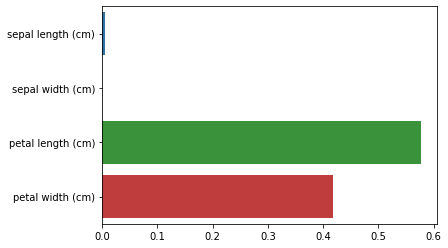

In [8]:
#특성 중요도 model.feature_importance_ 모델의 특성에 대한 중요도를 나타낸다.

import seaborn as sns 
import numpy as np 
print(model.feature_importances_) #iris data 의 특성 들의 중요도를 표시 한다 

sns.barplot(x = model.feature_importances_ , y = iris.feature_names)
plt.show()

##Decision Tree 실습 2

###two_moon 데이터 결정 트리 만들기

[[-1.09443462e-02  9.89784876e-01]
 [ 1.96749886e+00 -1.10921978e-01]
 [ 9.18923151e-01 -7.87831621e-03]
 [-1.97813183e-02  3.67422878e-02]
 [ 8.97047211e-01 -5.26043067e-01]
 [ 2.05087697e+00  4.82966687e-01]
 [ 5.52592656e-01  5.10008493e-01]
 [ 9.36108682e-01 -6.67176177e-01]
 [-8.57905150e-03  3.44030710e-01]
 [ 1.79962867e+00  3.22578165e-01]
 [-1.79739813e-01  5.12417381e-01]
 [ 1.96928635e+00 -1.84060982e-01]
 [ 1.40757108e+00 -6.55885144e-01]
 [ 1.04103920e+00  1.04537944e+00]
 [ 6.11861752e-01  5.09315861e-01]
 [-3.59476500e-01  1.05930036e+00]
 [ 2.54029695e-01  1.15116524e+00]
 [ 2.13555501e-01  8.82321641e-01]
 [-3.30880800e-01  8.04221145e-01]
 [ 1.06603845e+00  5.32174106e-01]
 [-7.06988363e-01  5.63246401e-01]
 [ 4.02928450e-01 -1.95330382e-01]
 [ 7.83527128e-01  5.65637444e-01]
 [ 7.29264348e-01 -4.64258931e-01]
 [-7.61131674e-01 -1.74321350e-03]
 [-8.30401440e-01 -2.33952062e-01]
 [ 7.12873757e-01  3.33441281e-01]
 [ 2.12091446e+00  1.51388354e-01]
 [ 1.76738365e+00 -1

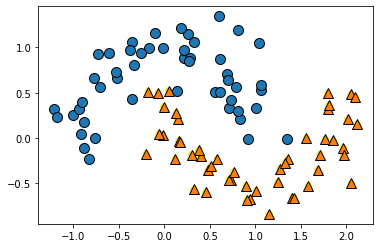

In [9]:
#import
import mglearn 
from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

#data load
x,y = make_moons(noise = 0.2 , random_state = 0)
print(x)
print(y)

#훈련/테스트 데이터 준비 
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

#데이터 시각화 
plt.scatter(x[:,0],x[:,1],c= y)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

In [10]:
#model 생성과 학습 
from sklearn.tree import DecisionTreeClassifier

#max_depth 를 주지 않으면 과대 적합 가능성이 높음 
model = DecisionTreeClassifier().fit(train_x,train_y)

print(model.score(train_x,train_y),model.score(test_x,test_y)) #1.0 ,0.88 로 학습만 완벽하게 잘되는 과대 적합 현상이 발생한다.


1.0 0.88


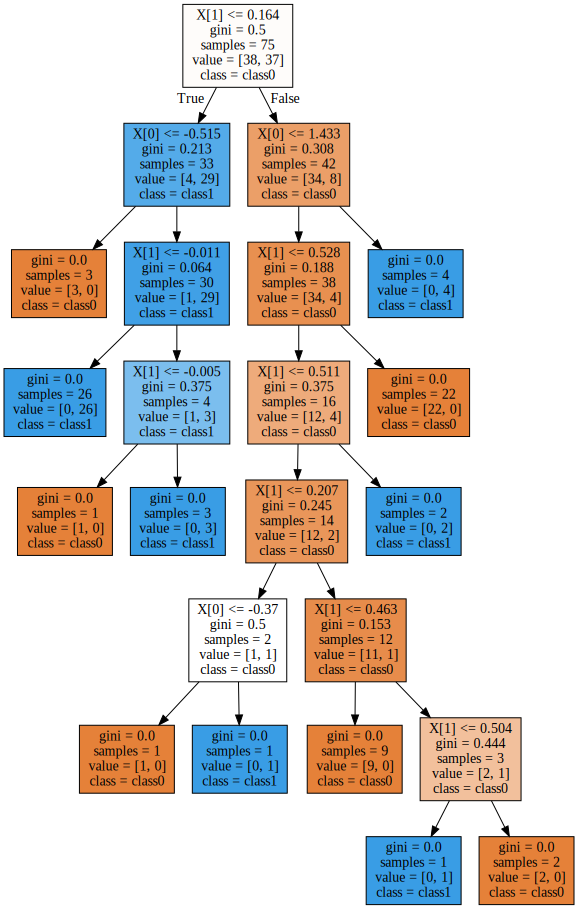

In [11]:
#결정트리 규칙을 시각화 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,out_file='tree.dot',class_names=['class0','class1'],impurity=True,filled = True)

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)


[0.31716188 0.68283812]


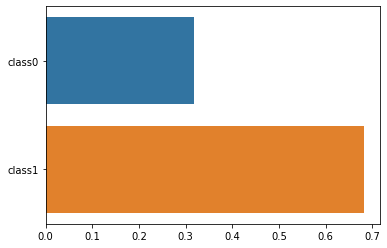

In [12]:
#특성 중요도 시각화 
print(model.feature_importances_)

sns.barplot(x = model.feature_importances_ , y = ['class0','class1'])
plt.show()

##분류 결과 시각화 

In [13]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def plot_decision_boundary(model, X, y):
    padding=0.15
    res=0.01
    
    # 데이터 세트의 x, y의 최대 값과 최소값
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    
    # x와 y의 범위
    x_range = x_max - x_min
    y_range = y_max - y_min
    
    # 범위에 패딩 추가
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # 위의 포인트 범위로 메쉬그리드를 생성
    xx,yy = np.meshgrid( np.arange(x_min,x_max,res), np.arange(y_min,y_max,res) )
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    # 모델을 사용하여 그리드 라벨의 각 지점에서 클래스를 예측하여 2D 배열을 벡터로 변환
    # c_ concatenates 예측을 수행 할 하나의 긴 벡터를 만듭니다.
    # 마지막으로 예측 벡터는 원래 데이터 형태로 재구성됩니다.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    # contourf() 를 이용하여 그리드에 class boundary를 시각화
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    
    # 원래 데이터와 레이블을 시각화
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

<Figure size 936x504 with 0 Axes>

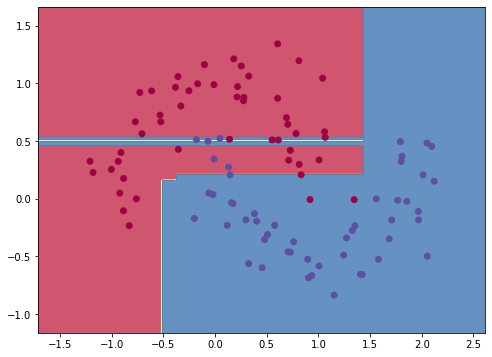

In [14]:
#분류 결과 시각화 
plt.figure(figsize = (13,7))
plot_decision_boundary(model,x,y)
plt.show()

##결정트리 과적합 

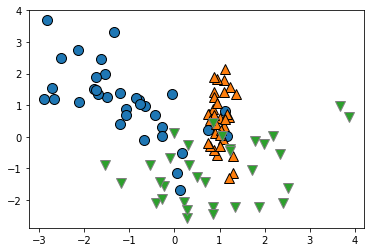

In [15]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

x,y = make_classification(n_features=2,n_classes=3,random_state=0,n_redundant=0,n_clusters_per_class=1)

mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

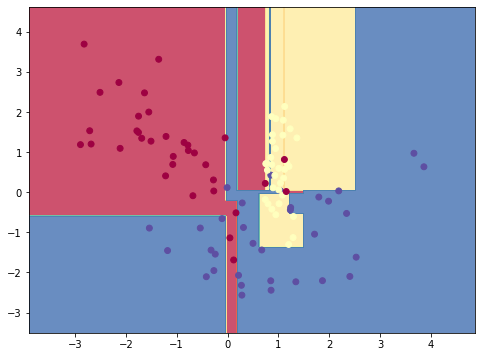

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x,y)
plot_decision_boundary(model,x,y)

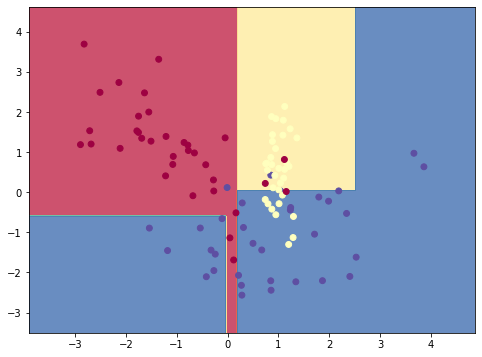

In [17]:
#max_depth 를 조정
model = DecisionTreeClassifier(max_depth=3,random_state = 0).fit(x,y)
plot_decision_boundary(model,x,y)

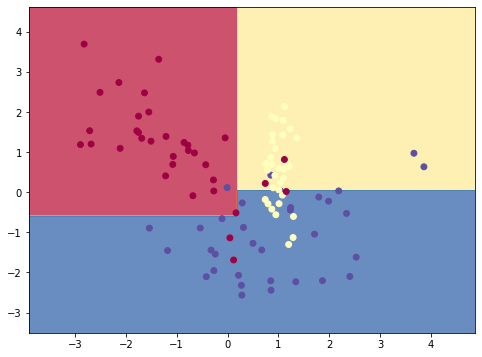

In [18]:
#max_depth 를 조정 min_sample_leaf 를 조정
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=6).fit(x,y)
plot_decision_boundary(model,x,y)

##Decision Tree 실습 3
###유방암 데이터 에 결정트리 적용 및 사전 가지치기

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

train_x,test_x,train_y,test_y = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state =0)

In [20]:
#model 학습 
model = DecisionTreeClassifier(max_depth = 3,min_samples_leaf= 5 ).fit(train_x,train_y)

print(model.score(train_x,train_y),model.score(test_x,test_y))

0.971830985915493 0.9370629370629371


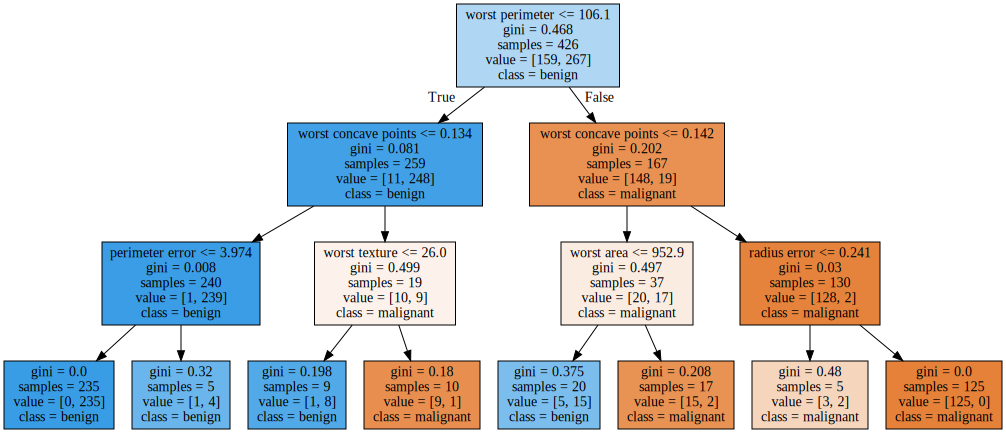

In [21]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,out_file='tree.dot',feature_names=cancer.feature_names,class_names = cancer.target_names,filled= True ,impurity= True)

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

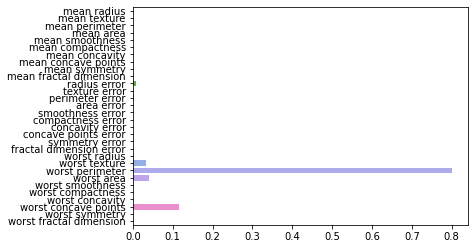

In [22]:
#시각화 
sns.barplot(x = model.feature_importances_,y =cancer.feature_names)

##데이터 준비 

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/temp/titanic.xls')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [25]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [26]:
#결측치 확인 
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

'\n나이 \n보트 등등 결측치 가 보임 -> 학습에 도움 안됌\n'

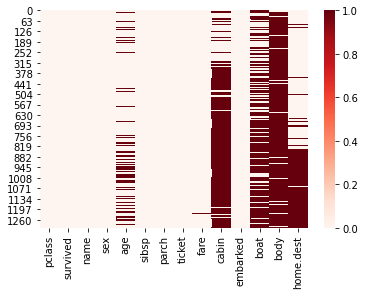

In [27]:
sns.heatmap(df.isnull(),cmap='Reds',cbar=True) #결측치 시각화 
'''
나이 
보트 등등 결측치 가 보임 -> 학습에 도움 안됌
'''


##쓸만한 데이터
- pclass : 객실 등급
- survived : 생존 유무
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- fare : 지불한 운임
- boat : 탈출한 보트가 있다면 boat 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

 

0    809
1    500
Name: survived, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


"\nsns.countplot('x축',data)\n"

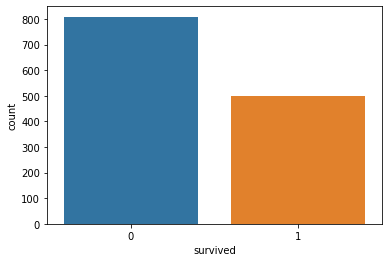

In [28]:
#생존자 수 부터 확인 
import seaborn as sns 

print(df['survived'].value_counts())

'''
0    809
1    500
'''
print(sns.countplot('survived',data = df))
'''
sns.countplot('x축',data)
'''


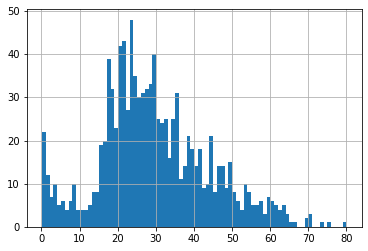

In [29]:
#나이순 데이터 보기 
df['age'].hist(bins = 80)

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


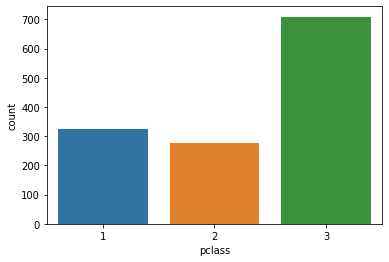

In [30]:
#선실 등급별(pclass) 상황 
sns.countplot('pclass',data=df)
df.groupby('pclass').mean()

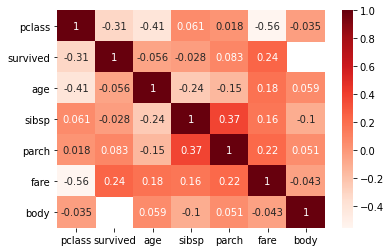

In [31]:
#상관계수 출력 
sns.heatmap(df.corr(),cmap = 'Reds',cbar = True,annot =True)

In [32]:
#객실 등급 연령대별 비교
x = df['age']
binx = [0,10,20,50,100]
label = ['baby','teenage','adult','old']
df['age_cut'] = pd.cut(x = x , bins = binx,labels = label , include_lowest=True)

In [33]:
df['age_cut']

0         adult
1          baby
2          baby
3         adult
4         adult
         ...   
1304    teenage
1305        NaN
1306      adult
1307      adult
1308      adult
Name: age_cut, Length: 1309, dtype: category
Categories (4, object): ['baby' < 'teenage' < 'adult' < 'old']

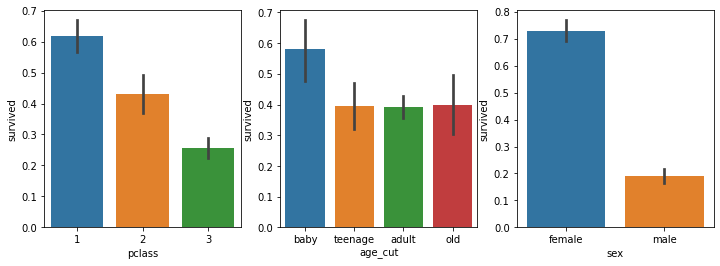

In [34]:
fig,axes = plt.subplots(1,3,figsize = (12,4))
sns.barplot('pclass','survived',data = df,ax = axes[0])  #(x값,y값 , data ax = subplot 위치) x y 값이 주어지면 두개의 수치를 확률로 비교 한다 x의 전체 경우의 수에 대하여
sns.barplot('age_cut','survived',data = df,ax = axes[1])
sns.barplot('sex','survived',data = df,ax = axes[2])

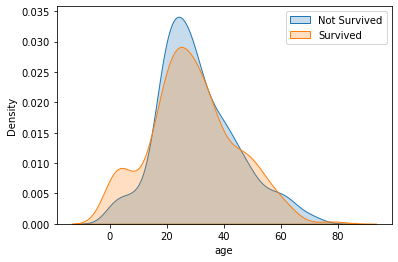

In [35]:
#연령대별 생존자수 비교 
survived_0 = df['age'][ (df['survived'] == 0) & (df['age'].notnull()) ]
survived_1 = df['age'][ (df['survived'] == 1) & (df['age'].notnull()) ]
sns.kdeplot(survived_0, shade=True)
sns.kdeplot(survived_1, shade=True)
plt.legend(['Not Survived', 'Survived'])

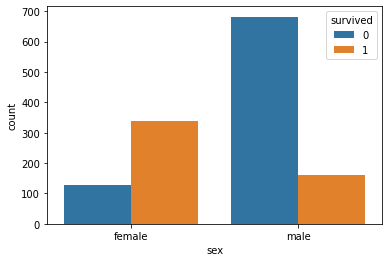

In [36]:
#성별 생존자수 비교
sns.countplot('sex',hue = 'survived',data = df)

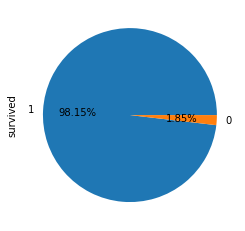

In [37]:
#구명보트 타고 사망한 사람
boats = df[df['boat'].notnull()]
boats['survived'].value_counts().plot.pie(autopct = '%1.2f%%')

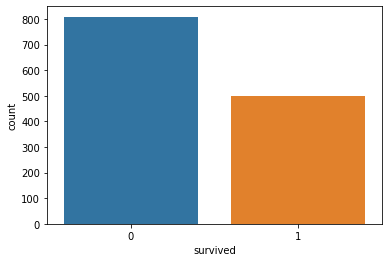

In [38]:
sns.countplot('survived',data = df)

##데이터 전처리 

In [39]:
df = pd.read_excel('/content/drive/MyDrive/temp/titanic.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [40]:
df['embarked'] #선착장이 S , C ,Q 순서대로 되있음 

#one hot encoding 을 수행 
df['embarked_q'] = df['embarked'] == 'Q' #Q 인거 True 나머지는 False
df['embarked_s'] = df['embarked'] == 'S' #S 인거 True 나머지는 False
df['embarked_c'] = df['embarked'] == 'C' #C 인거 True 나머지는 False

#data 여성을 1 남성을 0 으로 초기화 
df.loc[df['sex'] == 'male','sex'] =0
df.loc[df['sex'] == 'female','sex'] = 1

#운임료에 결측치가 있는 인원 평균값으로 초기화
fare_mean = df['fare'].mean()
df.loc[pd.isnull(df['fare']),'fare'] = fare_mean

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
 14  embarked_q  1309 non-null   bool   
 15  embarked_s  1309 non-null   bool   
 16  embarked_c  1309 non-null   bool   
dtypes: bool(3), float64(3), int64(4), object(7)
memory usage: 147.1+ KB


In [41]:
#feature 
#x = 객실 클래스 , 성별,요금,선착장 3개 , 총 6 요소
feature_names = ['pclass','sex','fare','embarked_c','embarked_q','embarked_s']
x = df[feature_names]
x.shape

(1309, 6)

In [42]:
#y_data 준비 
y = df['survived']
y = y.astype('int64')
y.value_counts()


0    809
1    500
Name: survived, dtype: int64

##Decision Tree 실습  5
전처리 된 타이타닉 데이터 Decision tree 실습 

test_size = 0.1
random_state = 13

In [43]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.1,random_state = 13)


In [44]:
depth = [4,5,6,7,8]

In [45]:
from sklearn.tree import DecisionTreeClassifier

for d in depth:
  model = DecisionTreeClassifier(max_depth=d).fit(train_x,train_y)
  print('max_depth:{} | trian_score:{} | test_score:{}'.format(d,model.score(train_x,train_y),model.score(test_x,test_y)))

max_depth:4 | trian_score:0.8005093378607809 | test_score:0.816793893129771
max_depth:5 | trian_score:0.8157894736842105 | test_score:0.8396946564885496
max_depth:6 | trian_score:0.8208828522920204 | test_score:0.7938931297709924
max_depth:7 | trian_score:0.8404074702886248 | test_score:0.8396946564885496
max_depth:8 | trian_score:0.8488964346349746 | test_score:0.8396946564885496


In [46]:
#7이 가장 괜찮은 데이터를 보임 but 학습이 잘 안돼는 이유는 단순하다  = test_size 랑 random state 값이 달라서 이다 
model = DecisionTreeClassifier(max_depth=7).fit(train_x,train_y)
print('max_depth:{} | trian_score:{} | test_score:{}'.format(7,model.score(train_x,train_y),model.score(test_x,test_y)))

max_depth:7 | trian_score:0.8404074702886248 | test_score:0.8396946564885496


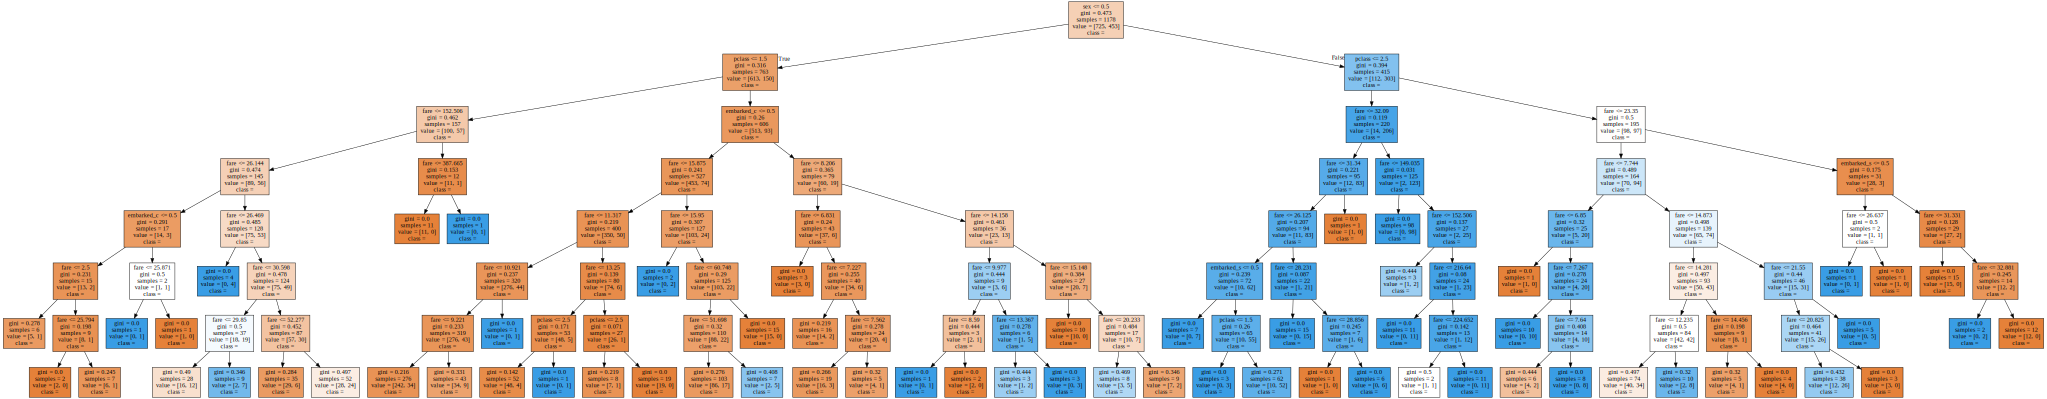

In [47]:
#시각화 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,out_file = 'tree.dot',feature_names=feature_names,class_names=['사망','생존'],filled = True,impurity=True)

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)


In [48]:
#정확도 예측 
from sklearn.metrics import accuracy_score
pred_y = model.predict(test_x)


In [49]:
#실제 데이터 를 넣어서 예측 

dicaprio = [3.,0.,30.,True,False,False]
winslet = [1.,1.,17.,False,False,True]

print(model.predict([dicaprio])) #사망 
print(model.predict([winslet])) #생존 

[0]
[1]


## 결정 트리 회귀 
분류 결정트리 랑 비슷 


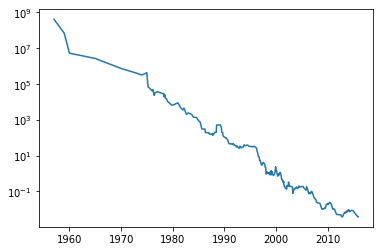

In [50]:
#data load
import numpy as np
import pandas as pd
import os
import mglearn
import matplotlib.pyplot as plt

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))  #mglearn 에 있는 데이터 가져오기
# 로그 스케일로 그린 램 가격 동향
plt.semilogy(ram_prices.date,ram_prices.price)
plt.show()


In [51]:
print(ram_prices)

     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
328         328  2015.58  4.500000e-03
329         329  2015.67  4.300000e-03
330         330  2015.75  4.200000e-03
331         331  2015.83  3.800000e-03
332         332  2015.92  3.700000e-03

[333 rows x 3 columns]


In [58]:
#결정 트리 회귀 적용 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#date 가 2000년 이전이면 train 
train_data = ram_prices[ram_prices['date']<2000.0]
test_data = ram_prices[ram_prices['date']>=2000.0]

#xdata 
train_x = train_data.date[:,np.newaxis]
test_x = test_data.date[:,np.newaxis]


#ydata
train_y = np.log(train_data.price)
test_y = np.log(test_data.price)

#model 
model_d = DecisionTreeRegressor().fit(train_x,train_y)
model_l = LinearRegression().fit(train_x,train_y)
test_x = ram_prices.date[:, np.newaxis]

#pred
pred_d = model_d.predict(test_x)
pred_l = model_l.predict(test_x)

# 예측한 값의 로그 스케일 되돌림
pred_tree = np.exp(pred_d)
pred_lr = np.exp(pred_l)

'\n2000년 이전 시각화  -> train\n2000년 이후 시각화  -> test\n'

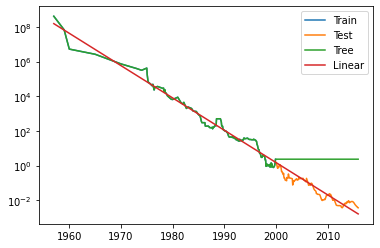

In [59]:
plt.semilogy(train_data.date,train_data.price,label = 'Train')
plt.semilogy(test_data.date,test_data.price,label = 'Test')
plt.semilogy(ram_prices.date,pred_tree,label = 'Tree')
plt.semilogy(ram_prices.date,pred_lr,label = 'Linear')
plt.legend()
'''
2000년 이전 시각화  -> train
2000년 이후 시각화  -> test
'''

In [64]:
#트리 형태로 보기 
from sklearn.tree import export_graphviz
import graphviz

dot_graph = export_graphviz(model_d,out_file = 'tree.dot',filled = True,impurity=True)

print(graphviz.Source(dot_graph))
